In [1]:
import numpy as np
import matplotlib.pyplot as plt

from loguru import logger

from plot import ecdf
from geogiant.common.files_utils import load_json, load_pickle
from geogiant.common.settings import PathSettings

path_settings = PathSettings()

targets = load_json(path_settings.OLD_TARGETS)
vps = load_json(path_settings.OLD_VPS)

In [2]:
# REFERENCE
ref_error_target = load_pickle(
    path_settings.RESULTS_PATH / "reference_target_geoloc_error.pickle"
)
ref_error_subnet = load_pickle(
    path_settings.RESULTS_PATH / "reference_subnet_geoloc_error.pickle"
)

# ECS-DNS
ecs_dns_error_target = load_pickle(
    path_settings.RESULTS_PATH / "ecs_dns_target_geoloc_error.pickle"
)
# ecs_dns_error_subnet = load_pickle(
#     path_settings.RESULTS_PATH / "ecs_dns_subnet_geoloc_error.pickle"
# )

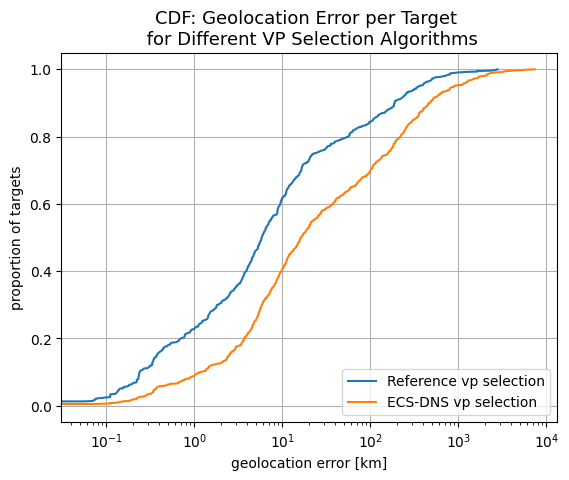

In [3]:
fig, ax1 = plt.subplots(1, 1)

# # plot results for reference vp selection
x, y = ecdf([e for e in ref_error_target.values()])
ax1.plot(x, y, label="Reference vp selection")

x, y = ecdf([e for e in ecs_dns_error_target.values()])
ax1.plot(x, y, label="ECS-DNS vp selection")

plt.xlabel("geolocation error [km]")
plt.ylabel("proportion of targets")
plt.legend(loc="lower right", fontsize=10)
plt.xscale("log")
plt.grid()
plt.title(
    f"CDF: Geolocation Error per Target \n for Different VP Selection Algorithms",
    fontsize=13,
)
plt.savefig(path_settings.FIGURE_PATH / "geoloc_error_all_vp_selection_algo.pdf")
plt.savefig(path_settings.FIGURE_PATH / "geoloc_error_all_vp_selection_algo.png")
plt.show()

In [4]:
# median errors
ref_median_error_target = np.median([e for e in ref_error_target.values()])
ref_median_error_subnet = np.median([e for e in ref_error_subnet.values()])

ecs_dns_median_error_target = np.median([e for e in ecs_dns_error_target.values()])
# ecs_dns_median_error_subnet = np.median([e for e in ecs_dns_error_subnet.values()])

logger.info("Median errors for each vp selection algorithms (TARGET)")
logger.info(
    f"Reference:: median error = {round(ref_median_error_target, 1)} [km] | on {len(ref_error_target)} targets"
)
logger.info(
    f"ECS-DNS  :: median error = {round(ecs_dns_median_error_target, 1)} [km] | on {len(ecs_dns_error_target)} targets"
)

logger.info("\n")
logger.info("Median errors for each vp selection algorithms (SUBNET)")
logger.info(
    f"Reference:: median error = {round(ref_median_error_subnet, 1)} [km] | on {len(ref_error_subnet)} subnets"
)
# logger.info(
#     f"Reference:: median error = {round(ecs_dns_median_error_subnet, 1)} [km] | on {len(ecs_dns_error_subnet)} subnets"
# )

2024-01-22 02:44:27.910 | INFO     | __main__:<module>:8 - Median errors for each vp selection algorithms (TARGET)
2024-01-22 02:44:27.912 | INFO     | __main__:<module>:9 - Reference:: median error = 5.9 [km] | on 768 targets
2024-01-22 02:44:27.913 | INFO     | __main__:<module>:12 - ECS-DNS  :: median error = 16.3 [km] | on 754 targets
2024-01-22 02:44:27.914 | INFO     | __main__:<module>:16 - 

2024-01-22 02:44:27.915 | INFO     | __main__:<module>:17 - Median errors for each vp selection algorithms (SUBNET)
2024-01-22 02:44:27.916 | INFO     | __main__:<module>:18 - Reference:: median error = 6.1 [km] | on 745 subnets
